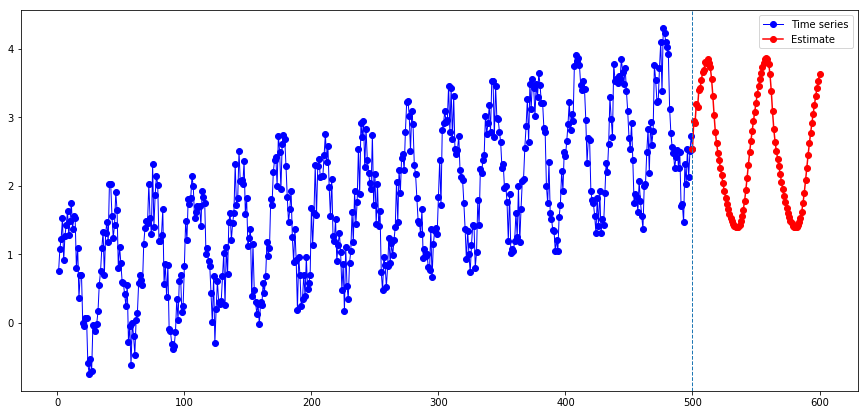

In [2]:
# RNN을 이용하여 시계열을 예측한다
# ------------------------------
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM
import numpy as np
import matplotlib.pyplot as plt

# RNN 입력값과 출력 목표값을 생성한다
# ex : s = ([1,2,3,4,5,6,7,8,9,10])
#      x, y = TrainDataSet(s, prior = 3)
#
# x = array([[[1, 2, 3]],    y = array([4,   --> 1,2,3 다음에는 4가 온다
#            [[2, 3, 4]],               5,   --> 2,3,4 다음에는 5가 온다
#            [[3, 4, 5]],               6,
#            [[4, 5, 6]],               7,
#            [[5, 6, 7]],               8,
#            [[6, 7, 8]],               9,
#            [[7, 8, 9]]])              10,])
#
# 3개 데이터의 시퀀스를 이용하여 다음 시계열을 예측하기 위한 예시임.
# ----------------------------------------------------------------------

def TrainDataSet(data, prior=1): # data자리에 시계열 데이터 와야.
    x, y = [], []
    for i in range(len(data)-prior):
        a = data[i:(i+prior)]
        x.append(a)
        y.append(data[i + prior])
    
    trainX = np.array(x)
    trainY = np.array(y)
    
    # RNN에 입력될 형식으로 변환한다. (데이터 개수, 1행 X prior 열)
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))

    return trainX, trainY

# 시계열 데이터 (sin)
data = np.arange(500)*0.005+np.sin(2 * np.pi * 0.03 * np.arange(500))+np.random.random(500) #+ np.random.random(500)

# 10개 데이터의 시퀀스로 다음 번 시계열을 예측함.
nPrior = 10

# 학습 데이터와 목표값 생성
trainX, trainY = TrainDataSet(data, nPrior)

# RNN 모델 빌드 및 fitting
model = Sequential()
model.add(LSTM(10, input_shape=(1,nPrior)))
model.add(Dense(1))
aaa=optimizers.Adam(lr=0.0005)
model.compile(loss='mse', optimizer='adam')
history = model.fit(trainX, trainY, epochs = 500,verbose=0)


# 향후 20 기간 데이터를 예측한다
nFuture = 100
dx = np.copy(data)
estimate = [dx[-1]]
for i in range(nFuture):
    # 마지막 nPrior 만큼 입력데이터로 다음 값을 예측한다
    x = dx[-nPrior:]
    x = np.reshape(x, (1, 1, nPrior))
    
    # 다음 값을 예측한다
    y = model.predict(x)[0][0]
    
    # 예측값을 저장해 둔다
    estimate.append(y)
    
    # 이전 예측값을 포함하여 또 다음 값을 예측하기위해 예측한 값을 저장해 둔다
    dx = np.insert(dx, len(dx), y)

# 원 시계열과 예측된 시계열을 그린다
ax1 = np.arange(1, len(data) + 1)
ax2 = np.arange(len(data), len(data) + len(estimate))
plt.figure(figsize=(15, 7))
#plt.ylim(-1.5, 1.5)
plt.plot(ax1, data, 'b-o', color='blue', label='Time series', linewidth=1)
plt.plot(ax2, estimate, 'b-o', color='red', label='Estimate')
plt.axvline(x=ax1[-1],  linestyle='dashed', linewidth=1)
plt.legend()
plt.show()









Epoch 1/500
2975/2975 [==============================] - 1s 231us/step - loss: 0.6725
Epoch 2/500
2975/2975 [==============================] - 0s 32us/step - loss: 0.4251
Epoch 3/500
2975/2975 [==============================] - 0s 31us/step - loss: 0.3069
Epoch 4/500
2975/2975 [==============================] - 0s 27us/step - loss: 0.2089
Epoch 5/500
2975/2975 [==============================] - 0s 33us/step - loss: 0.1177
Epoch 6/500
2975/2975 [==============================] - 0s 29us/step - loss: 0.0808
Epoch 7/500
2975/2975 [==============================] - 0s 29us/step - loss: 0.0561
Epoch 8/500
2975/2975 [==============================] - 0s 29us/step - loss: 0.0416
Epoch 9/500
2975/2975 [==============================] - 0s 30us/step - loss: 0.0325
Epoch 10/500
2975/2975 [==============================] - 0s 29us/step - loss: 0.0263
Epoch 11/500
2975/2975 [==============================] - 0s 30us/step - loss: 0.0217
Epoch 12/500
2975/2975 [==============================] - 0s 3

2975/2975 [==============================] - 0s 29us/step - loss: 6.8709e-04
Epoch 186/500
2975/2975 [==============================] - 0s 29us/step - loss: 7.6286e-04
Epoch 187/500
2975/2975 [==============================] - 0s 27us/step - loss: 7.1418e-04
Epoch 188/500
2975/2975 [==============================] - 0s 30us/step - loss: 6.7489e-04
Epoch 189/500
2975/2975 [==============================] - 0s 27us/step - loss: 6.9336e-04
Epoch 190/500
2975/2975 [==============================] - 0s 31us/step - loss: 7.1353e-04
Epoch 191/500
2975/2975 [==============================] - 0s 29us/step - loss: 6.9967e-04
Epoch 192/500
2975/2975 [==============================] - 0s 29us/step - loss: 6.5457e-04
Epoch 193/500
2975/2975 [==============================] - 0s 30us/step - loss: 6.8291e-04
Epoch 194/500
2975/2975 [==============================] - 0s 30us/step - loss: 6.5568e-04
Epoch 195/500
2975/2975 [==============================] - 0s 29us/step - loss: 6.7356e-04
Epoch 196/500

2975/2975 [==============================] - 0s 28us/step - loss: 6.2588e-04
Epoch 366/500
2975/2975 [==============================] - 0s 27us/step - loss: 6.7877e-04
Epoch 367/500
2975/2975 [==============================] - 0s 30us/step - loss: 5.8828e-04
Epoch 368/500
2975/2975 [==============================] - 0s 29us/step - loss: 5.5099e-04
Epoch 369/500
2975/2975 [==============================] - 0s 28us/step - loss: 5.0720e-04
Epoch 370/500
2975/2975 [==============================] - 0s 29us/step - loss: 5.1577e-04
Epoch 371/500
2975/2975 [==============================] - 0s 29us/step - loss: 5.7419e-04
Epoch 372/500
2975/2975 [==============================] - 0s 29us/step - loss: 5.2758e-04
Epoch 373/500
2975/2975 [==============================] - 0s 29us/step - loss: 5.5266e-04
Epoch 374/500
2975/2975 [==============================] - 0s 25us/step - loss: 5.4193e-04
Epoch 375/500
2975/2975 [==============================] - 0s 32us/step - loss: 5.1851e-04
Epoch 376/500

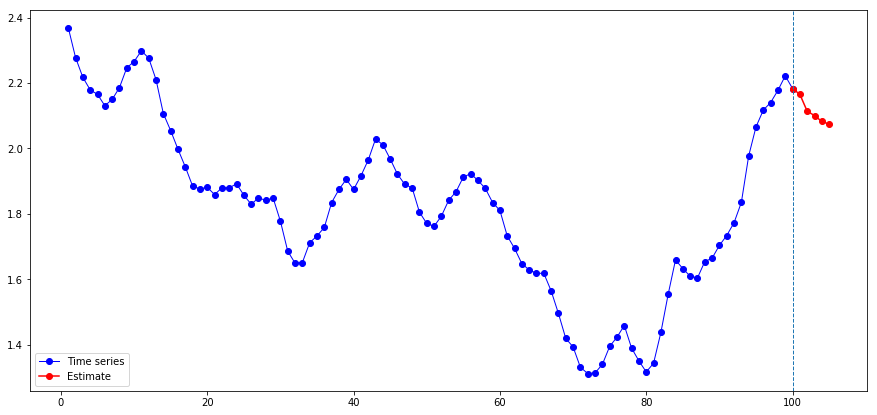

In [2]:
# LSTM을 이용하여 시계열을 예측한다
# ------------------------------
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from MyUtil import YahooData

# Yahoo site로부터 SK하이닉스 주가 데이터를 수집한다
#sam = YahooData.getStockDataYahoo('000660.KS', '2007-01-01')

# 저장된 파일을 읽어온다
sam = pd.read_pickle('20190220/stockData/000660.KS')

# RNN 입력값과 출력 목표값을 생성한다
# ex : s = ([1,2,3,4,5,6,7,8,9,10])
#      x, y = TrainDataSet(s, prior = 3)
#
# x = array([[[1, 2, 3]],    y = array([4,   --> 1,2,3 다음에는 4가 온다
#            [[2, 3, 4]],               5,   --> 2,3,4 다음에는 5가 온다
#            [[3, 4, 5]],               6,
#            [[4, 5, 6]],               7,
#            [[5, 6, 7]],               8,
#            [[6, 7, 8]],               9,
#            [[7, 8, 9]]])              10,])
#
# 3개 데이터의 시퀀스를 이용하여 다음 시계열을 예측하기 위한 예시임.
# ----------------------------------------------------------------------

def TrainDataSet(data, prior=1):
    x, y = [], []
    for i in range(len(data)-prior):
        a = data[i:(i+prior)]
        x.append(a)
        y.append(data[i + prior])
    
    trainX = np.array(x)
    trainY = np.array(y)
    
    # RNN에 입력될 형식으로 변환한다. (데이터 개수, 1행 X prior 열)
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))

    return trainX, trainY

# 주가 데이터
sam['ma'] = sam['Close'].rolling(window=3).mean()
sam = sam.dropna()

data = sam['ma'].values
data = (data - data.mean()) / data.std()

# 4개 데이터의 시퀀스로 다음 번 시계열을 예측함.
nPrior = 10

# 학습 데이터와 목표값 생성
trainX, trainY = TrainDataSet(data, nPrior)

# RNN 모델 빌드 및 fitting
model = Sequential()
model.add(LSTM(4, input_shape=(1,nPrior)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
history = model.fit(trainX, trainY, epochs = 500)

# 향후 5 기간 데이터를 예측한다
nFuture = 5
dx = np.copy(data)
estimate = [dx[-1]]
for i in range(nFuture):
    # 마지막 nPrior 만큼 입력데이로 다음 값을 예측한다
    x = dx[-nPrior:]
    x = np.reshape(x, (1, 1, nPrior))
    
    # 다음 값을 예측한다
    y = model.predict(x)[0][0]
    
    # 예측값을 저장해 둔다
    estimate.append(y)
    
    # 이전 예측값을 포함하여 또 다음 값을 예측하기위해 예측한 값을 저장해 둔다
    dx = np.insert(dx, len(dx), y)

# 원 시계열의 뒷 부분과 예측된 시계열을 그린다
dtail = data[-100:]
ax1 = np.arange(1, len(dtail) + 1)
ax2 = np.arange(len(dtail), len(dtail) + len(estimate))
plt.figure(figsize=(15, 7))
plt.plot(ax1, dtail, 'b-o', color='blue', label='Time series', linewidth=1)
plt.plot(ax2, estimate, 'b-o', color='red', label='Estimate')
plt.axvline(x=ax1[-1],  linestyle='dashed', linewidth=1)
plt.legend()
plt.show()


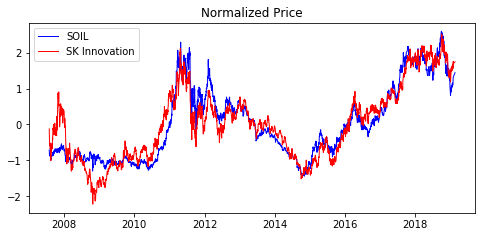

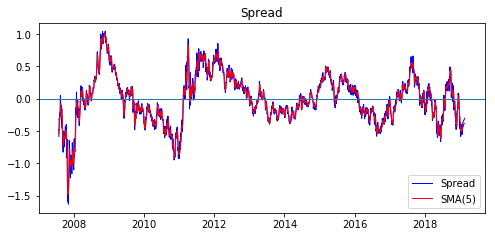

Epoch 1/1000
2834/2834 [==============================] - 1s 350us/step - loss: 0.0687
Epoch 2/1000
2834/2834 [==============================] - 0s 15us/step - loss: 0.0240
Epoch 3/1000
2834/2834 [==============================] - 0s 14us/step - loss: 0.0106
Epoch 4/1000
2834/2834 [==============================] - 0s 13us/step - loss: 0.0092
Epoch 5/1000
2834/2834 [==============================] - 0s 13us/step - loss: 0.0088
Epoch 6/1000
2834/2834 [==============================] - 0s 10us/step - loss: 0.0083
Epoch 7/1000
2834/2834 [==============================] - 0s 16us/step - loss: 0.0078
Epoch 8/1000
2834/2834 [==============================] - 0s 13us/step - loss: 0.0073
Epoch 9/1000
2834/2834 [==============================] - 0s 14us/step - loss: 0.0068
Epoch 10/1000
2834/2834 [==============================] - 0s 13us/step - loss: 0.0063
Epoch 11/1000
2834/2834 [==============================] - 0s 13us/step - loss: 0.0057
Epoch 12/1000
2834/2834 [==========================

2834/2834 [==============================] - 0s 13us/step - loss: 2.8479e-04
Epoch 182/1000
2834/2834 [==============================] - 0s 13us/step - loss: 2.7241e-04
Epoch 183/1000
2834/2834 [==============================] - 0s 12us/step - loss: 2.6515e-04
Epoch 184/1000
2834/2834 [==============================] - 0s 13us/step - loss: 2.7543e-04
Epoch 185/1000
2834/2834 [==============================] - 0s 13us/step - loss: 2.7176e-04
Epoch 186/1000
2834/2834 [==============================] - 0s 12us/step - loss: 2.5986e-04
Epoch 187/1000
2834/2834 [==============================] - 0s 12us/step - loss: 2.8596e-04
Epoch 188/1000
2834/2834 [==============================] - 0s 13us/step - loss: 2.5893e-04
Epoch 189/1000
2834/2834 [==============================] - 0s 13us/step - loss: 2.5834e-04
Epoch 190/1000
2834/2834 [==============================] - 0s 12us/step - loss: 2.5955e-04
Epoch 191/1000
2834/2834 [==============================] - 0s 12us/step - loss: 2.5919e-04
Epo

2834/2834 [==============================] - 0s 12us/step - loss: 2.1956e-04
Epoch 360/1000
2834/2834 [==============================] - 0s 13us/step - loss: 2.1525e-04
Epoch 361/1000
2834/2834 [==============================] - 0s 13us/step - loss: 2.1089e-04
Epoch 362/1000
2834/2834 [==============================] - 0s 13us/step - loss: 2.1525e-04
Epoch 363/1000
2834/2834 [==============================] - 0s 13us/step - loss: 2.1442e-04
Epoch 364/1000
2834/2834 [==============================] - 0s 12us/step - loss: 2.1504e-04
Epoch 365/1000
2834/2834 [==============================] - 0s 12us/step - loss: 2.1775e-04
Epoch 366/1000
2834/2834 [==============================] - 0s 13us/step - loss: 2.3362e-04
Epoch 367/1000
2834/2834 [==============================] - 0s 13us/step - loss: 2.1547e-04
Epoch 368/1000
2834/2834 [==============================] - 0s 13us/step - loss: 2.1989e-04
Epoch 369/1000
2834/2834 [==============================] - 0s 13us/step - loss: 2.1164e-04
Epo

2834/2834 [==============================] - 0s 13us/step - loss: 2.0276e-04
Epoch 538/1000
2834/2834 [==============================] - 0s 13us/step - loss: 1.9996e-04
Epoch 539/1000
2834/2834 [==============================] - 0s 12us/step - loss: 2.0929e-04
Epoch 540/1000
2834/2834 [==============================] - 0s 13us/step - loss: 2.0657e-04
Epoch 541/1000
2834/2834 [==============================] - 0s 13us/step - loss: 2.0283e-04
Epoch 542/1000
2834/2834 [==============================] - 0s 13us/step - loss: 1.9628e-04
Epoch 543/1000
2834/2834 [==============================] - 0s 13us/step - loss: 1.9466e-04
Epoch 544/1000
2834/2834 [==============================] - 0s 13us/step - loss: 1.9908e-04
Epoch 545/1000
2834/2834 [==============================] - 0s 12us/step - loss: 2.0876e-04
Epoch 546/1000
2834/2834 [==============================] - 0s 13us/step - loss: 2.1471e-04
Epoch 547/1000
2834/2834 [==============================] - 0s 13us/step - loss: 2.1488e-04
Epo

2834/2834 [==============================] - 0s 13us/step - loss: 1.9364e-04
Epoch 716/1000
2834/2834 [==============================] - 0s 13us/step - loss: 2.0367e-04
Epoch 717/1000
2834/2834 [==============================] - 0s 13us/step - loss: 1.9132e-04
Epoch 718/1000
2834/2834 [==============================] - 0s 13us/step - loss: 1.9596e-04
Epoch 719/1000
2834/2834 [==============================] - 0s 12us/step - loss: 1.9216e-04
Epoch 720/1000
2834/2834 [==============================] - 0s 12us/step - loss: 1.9536e-04
Epoch 721/1000
2834/2834 [==============================] - 0s 13us/step - loss: 1.9896e-04
Epoch 722/1000
2834/2834 [==============================] - 0s 12us/step - loss: 1.9410e-04
Epoch 723/1000
2834/2834 [==============================] - 0s 13us/step - loss: 1.9199e-04
Epoch 724/1000
2834/2834 [==============================] - 0s 13us/step - loss: 1.9530e-04
Epoch 725/1000
2834/2834 [==============================] - 0s 12us/step - loss: 1.9604e-04
Epo

2834/2834 [==============================] - 0s 13us/step - loss: 1.8608e-04
Epoch 894/1000
2834/2834 [==============================] - 0s 13us/step - loss: 2.0029e-04
Epoch 895/1000
2834/2834 [==============================] - 0s 12us/step - loss: 1.9042e-04
Epoch 896/1000
2834/2834 [==============================] - 0s 13us/step - loss: 1.9391e-04
Epoch 897/1000
2834/2834 [==============================] - 0s 14us/step - loss: 1.9583e-04
Epoch 898/1000
2834/2834 [==============================] - 0s 14us/step - loss: 2.1354e-04
Epoch 899/1000
2834/2834 [==============================] - 0s 13us/step - loss: 1.9463e-04
Epoch 900/1000
2834/2834 [==============================] - 0s 13us/step - loss: 2.0874e-04
Epoch 901/1000
2834/2834 [==============================] - 0s 13us/step - loss: 1.9253e-04
Epoch 902/1000
2834/2834 [==============================] - 0s 12us/step - loss: 1.9076e-04
Epoch 903/1000
2834/2834 [==============================] - 0s 12us/step - loss: 1.9860e-04
Epo

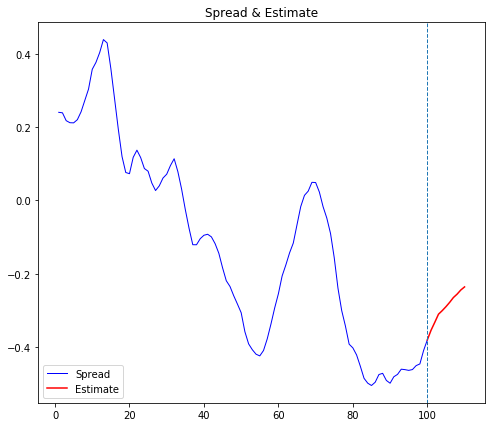

In [22]:
# LSTM을 이용하여 Pairs Trading용 Spread 시계열을 예측한다
# ------------------------------------------------------
from keras.models import Sequential
from keras.layers import Dense, LSTM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from MyUtil import YahooData

# SOIL과 SK이노베이션 주가를 읽어와서 Pairs Trading Spread를 생성한다.
# soil = YahooData.getStockDataYahoo('010950.KS', '2007-01-01')
# skin = YahooData.getStockDataYahoo('096770.KS', '2007-01-01')
soil = pd.read_pickle('20190220/StockData/010950.KS')
skin = pd.read_pickle('20190220/StockData/096770.KS')
pair = pd.DataFrame()
pair['soil'] = soil['Close']
pair['skin'] = skin['Close']
pair = pair.dropna()
pair['npaA'] = (pair['soil'] - np.mean(pair['soil'])) / np.std(pair['soil'])
pair['npaB'] = (pair['skin'] - np.mean(pair['skin'])) / np.std(pair['skin'])
pair['spread'] = pair['npaA'] - pair['npaB']
pair['mspread'] = pair['spread'].rolling(5).mean()
pair = pair.dropna()

# Normalized 주가를 그린다
plt.figure(figsize=(8, 3.5))
plt.plot(pair['npaA'], color='blue', label='SOIL', linewidth=1)
plt.plot(pair['npaB'], color='red', label='SK Innovation', linewidth=1)
plt.title('Normalized Price')
plt.legend()
plt.show()

# Spread와 Spread의 5-기간 이동평균을 그린다
plt.figure(figsize=(8, 3.5))
plt.plot(pair['spread'], color='blue', label='Spread', linewidth=1)
plt.plot(pair['mspread'], color='red', label='SMA(5)', linewidth=1)
plt.axhline(y=np.mean(pair['spread']), linewidth=1)
plt.title('Spread')
plt.legend()
plt.show()

# RNN 입력값과 출력 목표값을 생성한다
# ex : s = ([1,2,3,4,5,6,7,8,9,10])
#      x, y = TrainDataSet(s, prior = 3)
#
# x = array([[[1, 2, 3]],    y = array([4,   --> 1,2,3 다음에는 4가 온다
#            [[2, 3, 4]],               5,   --> 2,3,4 다음에는 5가 온다
#            [[3, 4, 5]],               6,
#            [[4, 5, 6]],               7,
#            [[5, 6, 7]],               8,
#            [[6, 7, 8]],               9,
#            [[7, 8, 9]]])              10,])
#
# 3개 데이터의 시퀀스를 이용하여 다음 시계열을 예측하기 위한 예시임.
# ----------------------------------------------------------------------
def TrainDataSet(data, prior=1):
    x, y = [], []
    for i in range(len(data)-prior):
        a = data[i:(i+prior)]
        x.append(a)
        y.append(data[i + prior])
    
    trainX = np.array(x)
    trainY = np.array(y)
    
    # RNN에 입력될 형식으로 변환한다. (데이터 개수, 1행 X prior 열)
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))

    return trainX, trainY

# 10개 데이터의 시퀀스로 다음 번 시계열을 예측함.
nPrior = 10

# 학습 데이터와 목표값 생성
data = pair['mspread'].values
trainX, trainY = TrainDataSet(data, nPrior)

# RNN 모델 빌드 및 fitting
model = Sequential()
model.add(LSTM(20, input_shape=(1,nPrior)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
history = model.fit(trainX, trainY, batch_size=100, epochs = 1000)

# 향후 10 기간 데이터를 예측한다
nFuture = 10
dx = np.copy(data)
estimate = [dx[-1]]
for i in range(nFuture):
    # 마지막 nPrior 만큼 입력데이로 다음 값을 예측한다
    x = dx[-nPrior:]
    x = np.reshape(x, (1, 1, nPrior))
    
    # 다음 값을 예측한다
    y = model.predict(x)[0][0]
    
    # 예측값을 저장해 둔다
    estimate.append(y)
    
    # 이전 예측값을 포함하여 또 다음 값을 예측하기위해 예측한 값을 저장해 둔다
    dx = np.insert(dx, len(dx), y)

# 원 시계열의 마지막 부분 100개와 예측된 시계열을 그린다
dtail = data[-100:]
ax1 = np.arange(1, len(dtail) + 1)
ax2 = np.arange(len(dtail), len(dtail) + len(estimate))
plt.figure(figsize=(8, 7))
plt.plot(ax1, dtail, color='blue', label='Spread', linewidth=1)
plt.plot(ax2, estimate, color='red', label='Estimate')
plt.axvline(x=ax1[-1],  linestyle='dashed', linewidth=1)
plt.title('Spread & Estimate')
plt.legend()
plt.show()
